키워드 추출: 통계적 접근

1. 단어 빈도 
- 단어의 등장 빈도를 활용하여 중요 단어를 추출
- 단어 빈도 접근 방식은 문서를 단순한 단어 모음으로 간주 
- 단어의 의미, 구조, 문법 및 단어 순서를 고려하지 않음

2. 연어 / 동시발생
- 단어의 의미구조를 이해하기 위해서 n-gram과 같은 통계기법을 활용하여 연어나 동시 발생 단어를 하나의 단어로 처리

  - 연어: 연이어 함께 자주 등장하는 단어의 묶음
  ex. 고객 서비스
  - 동시 발생: 동일 코퍼스 내에 함께 등장하는 단어 묶음, 연어와 다르게 반드시 단어가 인접할 필요없음

# 0. 데이터 준비

Mecab 설치 (필요시)

In [ ]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
# !sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     |████████████████████████████████| 19.4MB 41.8MB/s 
     |████████████████████████████████| 3.8MB 45.5MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing 

#1. Tfidf 활용 핵심키워드 추출

- 토큰화 -> 토큰 인덱스 생성 -> TF-IDF 계산 -> TF-IDF 스코어가 높은 순으로 추출 

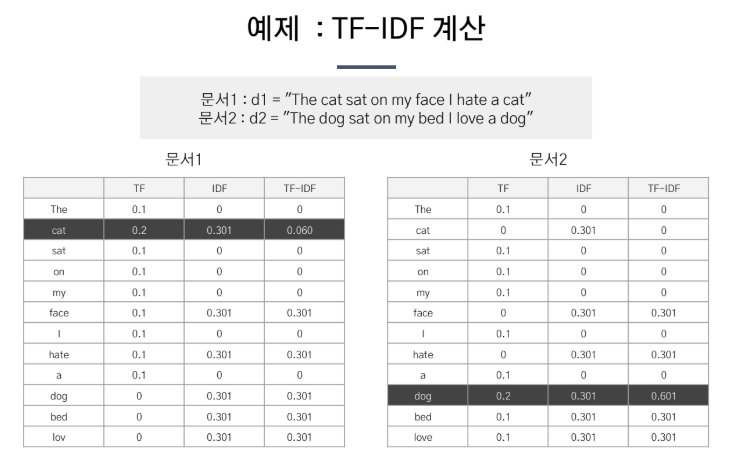

## 1.1 sklearn 활용

In [ ]:
import requests 
from bs4 import BeautifulSoup

def get_news_by_url(url):
  res = requests.get(url)
  bs = BeautifulSoup(res.content, 'html.parser')

  title = bs.select('h3#articleTitle')[0].text #제목
  content = bs.select('#articleBodyContents')[0].get_text().replace('\n', " ") #본문
  content = content.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
  return  content.strip()

docs = []
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=018&aid=0004430108') )
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=001&aid=0011614790') )
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=014&aid=0004424362') )
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=119&aid=0002402191') )
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002882728') )
len(docs)

5

In [ ]:
# 전처리
from konlpy.tag import Mecab
mecab = Mecab()

# Mecab pos tagging 
print(mecab.pos(docs[0]))

preprocessed_docs = []
for doc in docs:
  # 명사와 동사만으로 문서 전처리
  preprocessed_docs.append(' '.join([token[0] for token in mecab.pos(doc) if token[1][0] in ["N", "Y"] ]))
preprocessed_docs

[('과기', 'NNG'), ('정통부', 'NNG'), (',', 'SC'), ('22', 'SN'), ('일', 'NNBC'), ('유영민', 'NNP'), ('장관', 'NNG'), ('등', 'NNB'), ('참석', 'NNG'), ('해', 'XSV+EC'), ('기념행사', 'NNG'), ('2021', 'SN'), ('년', 'NNBC'), ('까지', 'JX'), ('1516', 'SN'), ('억', 'NR'), ('원', 'NNBC'), ('투입', 'NNG'), (',', 'SC'), ('5100', 'SN'), ('여종', 'NNG'), ('데이터', 'NNG'), ('구축', 'NNG'), ('민간', 'NNG'), ('클라우드', 'NNP'), ('통한', 'VV+ETM'), ('외부', 'NNG'), ('연계', 'NNG'), ('체계', 'NNG'), ('도', 'JX'), ('.', 'SF'), ('."', 'SY'), ('개방', 'NNG'), ('성', 'XSN'), ('강화', 'NNG'), ('"[', 'SY'), ('이', 'JKS'), ('데일리', 'NNP'), ('이재운', 'NNP'), ('기자', 'NNG'), (']', 'SSC'), ('국가', 'NNG'), ('차원', 'NNG'), ('의', 'JKG'), ('빅', 'NNG'), ('데이터', 'NNG'), ('활용', 'NNG'), ('시대', 'NNG'), ('가', 'JKS'), ('열린다', 'VV+EF'), ('.', 'SF'), ('새로운', 'VA+ETM'), ('산업', 'NNG'), ('창출', 'NNG'), ('과', 'JC'), ('기존', 'NNG'), ('산업', 'NNG'), ('의', 'JKG'), ('변화', 'NNG'), ('에', 'JKB'), ('이르', 'VV'), ('는', 'ETM'), ('‘', 'SY'), ('혁신', 'NNG'), ('성', 'XSN'), ('장', 'NNG'), ('’', 'SY'), ('을'

['과기 정통부 일 유영민 장관 등 참석 기념행사 년 억 원 투입 여종 데이터 구축 민간 클라우드 외부 연계 체계 개방 강화 데일리 이재운 기자 국가 차원 빅 데이터 활용 시대 산업 창출 기존 산업 변화 혁신 장 센터 문 개 분야 데이터 경제 발전 정부 청사진 현실 구현 데 계획 일 과학 기술 정보 통신부 서울 중구 대한 상공 회의소 데이터 생태 조성 혁신 성장 기반 마련 빅 데이터 플랫 폼 센터 출범식 행사 개최 유영민 과기 정통부 장관 노웅래 국회 과학 기술 정보 방송 통신 위원회 위원장 등 명 참가 개 분야 개 센터 년 간 억 원 투입 이미지 픽사 베이 빅 데이터 데이터 활용 혁신 장 문재 정부 경제 성장 핵심 요소 중 하나 문재인 대통령 데이터 활용 이 정보 보호 보안 중요 강조 맥락 속 빅 데이터 센터 공공 민간 협업 활용 양질 데이터 생산 구축 플랫 폼 이 수집 분석 유통 역할 담당 과기 정통부 분야 플랫 폼 개소 이 연계 기관 센터 개소 구축 데 년 억 원 투입 계획 올해 억 원 규모 사업 추진 대상 분야 금융 카드 환경 한국 수자원 공사 문화 한국 문화 정보원 교통 한국 교통 연구원 헬 스케어 국립암센터 유통 소비 매일 방송 통신 중소기업 비즈 지역 경제 경기도 청 산림 한국 임업 흥원 등 차 공모 개 빅 데이터 센터 선정 다음 달 일 차 공모 개 추가 선정 개 지원 운영 계획 이 데이터 생태계 혁신 기업 경쟁력 제고 역할 수행 주요 활용 전략 사례 빅 데이터 활용 신 新 시장 창출 방안 금융 플랫 폼 경우 소 상공 신용 평가 고도 등 금융 취약 계층 대상 중 금리 대출 절감 연간 조 원 신규 대출 창출 전망 유통 소비 중소기업 플랫 폼 소상 공인 중소기업 폐업 감소 문화 플랫 폼 문화 예술 관람 생활 체육 참여 방안 모색 의료비 절감 헬스 케어 기업 매출 향상 산업 육성 통신 산림 등 눈길 과기 정통부 제공 년 여종 데이터 구축 알고리즘 제공 센터 분야 데이터 부족 문제 해소 올해 말 시장 수요 여종 신규 데이터 생산 구축 사업 완료 년 여종 

In [ ]:
# TF-IDF 계산 
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df = 0.85, max_features =10000)
DTM = count_vectorizer.fit_transform(preprocessed_docs)

DTM.todense(), list(count_vectorizer.vocabulary_.keys())[:10] 

(matrix([[0, 0, 0, ..., 0, 1, 0],
         [0, 0, 0, ..., 0, 0, 1],
         [1, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 1, 1, ..., 2, 0, 0]]),
 ['과기', '정통부', '유영민', '장관', '참석', '기념행사', '투입', '여종', '구축', '민간'])

CountVectorizer 
- max_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
단어장에 포함되기 위한 최대 빈도   
- min_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
단어장에 포함되기 위한 최소 빈도

In [ ]:
# TF-IDF 계산 ver2
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(smooth_idf = True)
tfidf_transformer.fit(DTM)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
# 핵심 키워드 추출
def sort_keywords(keywords):
  return sorted(zip(keywords.col, keywords.data), key = lambda x: (x[1], x[0]), reverse = True)

def extract_keywords(feature_names, sorted_keywords, n=5):
  return [(feature_names[idx], score) for idx, score in sorted_keywords[:n]]

In [ ]:
doc = preprocessed_docs[0] #핵심 키워드 추출할 문서 조회

feature_names = count_vectorizer.get_feature_names() #TF-IDF 단어 목록
tf_idf_vector = tfidf_transformer.transform(count_vectorizer.transform([doc])) #문서의 tf-idf 추출
sorted_keywords = sort_keywords(tf_idf_vector.tocoo()) # TF-IDF를 기준으로 역순 정렬

# 사용자가 지정한 갯수만큼 키워드 추출
keywords = extract_keywords(feature_names, sorted_keywords, 5)

print("\n===== 원문 =====")
print(docs[0][:100])
print("\n=== 핵심키워드 ===")
for k in keywords:
    print(k)



===== 원문 =====
과기정통부, 22일 유영민 장관 등 참석해 기념행사2021년까지 1516억원 투입, 5100여종 데이터 구축민간 클라우드 통한 외부연계체계도.."개방성 강화"[이데일리 이재운 기자

=== 핵심키워드 ===
('플랫', 0.2634706436703944)
('계획', 0.2258319802889095)
('정통부', 0.1881933169074246)
('과기', 0.1881933169074246)
('혁신', 0.15183318311942953)


## 1.2 gensim 활용

In [ ]:
# 전처리 
from konlpy.tag import Mecab
mecab = Mecab()

preprocessed_docs = []
for doc in docs :
  # 명사와 동사만으로 문서 전처리
  preprocessed_docs.append(' '.join([token[0] for token in mecab.pos(doc) if token[1][0] in ['N', 'V']]))
preprocessed_docs[0][:100]

'과기 정통부 일 유영민 장관 등 참석 기념행사 년 억 원 투입 여종 데이터 구축 민간 클라우드 통한 외부 연계 체계 개방 강화 데일리 이재운 기자 국가 차원 빅 데이터 활용 시대 '

In [ ]:
# TF-IDF 계산
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

document_ls = [doc.split() for doc in preprocessed_docs]
dct = Dictionary(document_ls) # 인덱스(key) - 단어(valuue) 인 딕셔너리 생성
corpus = [dct.doc2bow(doc) for doc in document_ls] # 각 문서에 포함된 단어를 인덱스로 변환하여 corpus 생성
tfidf = TfidfModel(corpus) # TF-IDF 산출

In [ ]:
# 핵심 키워드 추출
def sort_keywords(tfidf):
    return sorted(tfidf, key=lambda x: (x[1], x[0]), reverse=True)

def extract_keywords(feature_names, sorted_keywords, n=5):
    return [(feature_names[idx], score) for idx, score in sorted_keywords[:n]]

In [ ]:
doc = corpus[0]

sorted_keywords = sort_keywords(tfidf[doc]) # TF-IDF를 기준으로 역순 정렬

# 사용자가 지정한 갯수만큼 키워드 추출
keywords = extract_keywords(dct, sorted_keywords, 5)

print("\n=== 핵심키워드 ===")
for k in keywords:
    print(k)


=== 핵심키워드 ===
('플랫', 0.260111262735105)
('폼', 0.260111262735105)
('계획', 0.2229525109158043)
('정통부', 0.18579375909650356)
('과기', 0.18579375909650356)


In [ ]:
tfidf[doc]

[(0, 0.021155348483460852),
 (1, 0.011793957648078673),
 (3, 0.023587915296157346),
 (4, 0.021155348483460852),
 (5, 0.037158751819300714),
 (6, 0.037158751819300714),
 (7, 0.037158751819300714),
 (8, 0.036063616033346915),
 (9, 0.06346604545038255),
 (10, 0.037158751819300714),
 (11, 0.042310696966921704),
 (12, 0.021155348483460852),
 (13, 0.037158751819300714),
 (14, 0.021155348483460852),
 (15, 0.037158751819300714),
 (16, 0.021155348483460852),
 (17, 0.005151945147620987),
 (18, 0.07431750363860143),
 (19, 0.10577674241730427),
 (20, 0.037158751819300714),
 (21, 0.2229525109158043),
 (22, 0.037158751819300714),
 (23, 0.010303890295241975),
 (24, 0.037158751819300714),
 (25, 0.07431750363860143),
 (26, 0.037158751819300714),
 (27, 0.011793957648078673),
 (28, 0.037158751819300714),
 (29, 0.18579375909650356),
 (30, 0.042310696966921704),
 (31, 0.037158751819300714),
 (32, 0.042310696966921704),
 (33, 0.07431750363860143),
 (34, 0.011793957648078673),
 (35, 0.037158751819300714),
 (

# Textrank
: Bringing Order into Texts 논문 기반

- 그래프 기반 Ranking Model: Textrank
- 키워드와 문장 추출을 위한 비지도 학습 방법을 제안
- 그래프 기반 랭킹 알고리즘은 구글 PageRank에서 사용됨(웹 분석에 성공적으로 적용)
- 그래프 기반 랭킹 알고리즘은 그래프의 각 vertex(노드)의 중요도를 결정하는 방법
- 즉, TextRank는 그래프 기반 랭킹 알고리즘으로 단어 Vertex의 중요도를 결정하는 방법

개요 
1. Undirected Graphs: Vertex 간 연결한 edge에 방향이 없는 undirected 그래프 사용
  - Undirected 그래프는 결과가 더 빠르게 수렴
  - Page rank: 방향이 있는 directed 그래프
  - Text rank: 방향이 없는 undirected 그래프

2. Weighted Graph
  - Weight가 있다 => 각 edge로부터 score를 받는다. 
  - weighted 그래프가 수렴속도가 빠름
  - Text rank: undirected / weighted graph 사용

3. Text를 그래프로 만들어 TextRankScore 계산하여 핵심 키워드 / 핵심 문장 추출

순서
1. 전처리: 텍스트를 품사를 태깅하여 토큰화, 품사 중 명사와 동사만을 사용
2. 단어 윈도우에 동시 등장한 토큰을 엣지로 연결하여 그래프 생성
3. 0.0001을 threshold로 20-30회 계산을 반복하여 Text Rank Score 계산


Text Rank 평가
- 정밀도(Precision)과 F-measure에서 가장 높음
- 재현율(Recall)은 지도학습에 비해 높지 않음
- Window가 클수록 정확도가 낮아짐
  - 멀리 떨어져 있는 단어가 관계를 정의할 만큼 강력하지 않음

- 즉, 정밀도가 높다 => 추출한 단어가 핵심단어일 확률이 높다
- 재현율이 낮다 => 지도학습에 비하여 핵심 키워드가 추출될 확률이 낮다  
  
정밀도: True라고 분류한 것 중 실제 True의 비율(모델 관점)

재현율: 실제 True인 것 중 모델이 True로 예측한 것(데이터 관점)

F1score: Precision과 Recall의 조화평균 


Text랭크가 잘 작동하는 이유
- 텍스트 단위(Vertex)단위의 로컬 텍스트를 고려할 뿐만 아니라, 전체 텍스트(graph)에서 재귀적으로 정보를 고려하기 때문에 
- 링크하는 다른 텍스트 단위의 '중요성'을 바탕으로 텍스트 단위를 평가 
- 깊은 언어지식이나, 도메인 별 corpora 없이, 다른 도메인, 장르, 언어에 적용 가능

## 실습1. 행렬활용

(1) 토큰화(Tokenization): 분석 텍스트 정제

(2) Unique한 토큰 목록 생성: 그래프를 만들기 위해

In [ ]:
token = ['딸기', '바나나', '사과', '딸기', '파인애플']
nodes = ['바나나', '사과', '파인애플', '딸기']
vocab = nodes

vocab2idx = {vocab[i]: i for i in range(len(vocab))} #vocab을 인덱스로 변환
idx2vocab = {i: vocab[i] for i in range(len(vocab))}
vocab2idx

{'딸기': 3, '바나나': 0, '사과': 1, '파인애플': 2}

(3) 그래프 생성(Weighted edge 계산)
- Textrank는 그래프 기반 모델
- 각 단어(토큰)은 그래프의 노드(Vertex)
- Weighted_edge행렬은 각 노드간 가중치 정보를 담고 있음
 - weighted_edge[i][j]는 i번쨰 단어와 j번째 단어의 가중치를 의미
 - weighted_edge[i][j]가 0인 경우는 노드간 연결이 없음을 의미
- 모든 노드는 1로 초기화

In [ ]:
import numpy as np
import math
vocab_len  = len(vocab)

# 토큰 별로 그래프 edge를 Matrix 형태로 생성
weighted_edge = np.zeros((vocab_len, vocab_len))

# 각 토큰 노드별로 스코어 1로 초기화
score = np.ones((vocab_len))

# co-occurence를 판단하기 위한 window size 설정
window_size = 2
covered_coocurrences = []

# weighted_edge 구현
for window_start in range(len(token)-window_size +1):
  window = token[window_start: window_start + window_size]
  for i in range(window_size):
    for j in range(i+1, window_size):
      if window[i] in vocab2idx.keys() and window[j] in vocab2idx.keys():
        index_i = window_start + i
        index_j = window_start + j

        if [index_i, index_j] not in covered_coocurrences:
          weighted_edge[vocab2idx[window[i]]][vocab2idx[window[j]]] = 1
          weighted_edge[vocab2idx[window[j]]][vocab2idx[window[i]]] = 1
          covered_coocurrences.append([index_i, index_j])

for i in range(len(vocab)):
  sumi = weighted_edge[i].sum()
  weighted_edge[i] = weighted_edge[i] / sumi if sumi > 0 else 0

weighted_edge


array([[0.        , 0.5       , 0.        , 0.5       ],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ]])

(4) 각 노드의 Score 계산  
각 노드와 연결된 Weighted edge의 값을 합산 



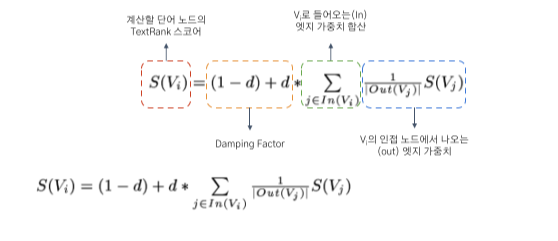

Score = (1 -d) + d * Summation   
Summation = Sum( 각 노드의 Score / 인접노드의 가중치) 

In [ ]:
MAX_ITERATION = 50
d = 0.85
threshold = 0.0001 #convergence threshold
score = np.ones((vocab_len))

for iter in range(0, MAX_ITERATION):
  prev_score = np.copy(score)

  for i in range(len(vocab)):
    summation = 0
    for j in range(len(vocab)):
      if weighted_edge[j][i] != 0:
        summation += weighted_edge[j][i] *prev_score[j] #?? 
      
      score[i] = (1-d) + d*summation

      if np.sum(np.fabs(prev_score - score)) <= threshold:
        break

score

array([0.98371127, 0.98371127, 0.56563398, 1.46694347])

In [ ]:
MAX_ITERATION = 50
d = 0.85
threshold = 0.0001 #convergence threshold
score = np.ones((vocab_len))

for iter in range(0, MAX_ITERATION):
  prev_score = np.copy(score)

  for i in range(len(vocab)):
    summation = 0
    for j in range(len(vocab)):
      if weighted_edge[j][i] != 0:
        summation += weighted_edge[j][i] * score[j] #?? 값은 똑같이 나옴.
      
      score[i] = (1-d) + d*summation

      if np.sum(np.fabs(prev_score - score)) <= threshold:
        break

score

array([0.98371125, 0.98371125, 0.56563397, 1.46694344])

In [ ]:
score

array([1., 1., 1., 1.])

(5) 핵심 단어 추출

In [ ]:
sorted_index = None
sorted_index = (np.argsort(score)[::-1])
n = 4
print("\n=== 핵심키워드 ===")
for i in range(n):
  print(str(idx2vocab[sorted_index[i]])+ " : " + str(score[sorted_index[i]]))


=== 핵심키워드 ===
딸기 : 1.4669434685172877
사과 : 0.9837112743595123
바나나 : 0.9837112743595123
파인애플 : 0.5656339827636873


## 실습2. 그래프 활용

In [ ]:
import requests 
from bs4 import BeautifulSoup

def get_news_by_url(url):
  res = requests.get(url)
  bs = BeautifulSoup(res.content, 'html.parser')

  title = bs.select('h3#articleTitle')[0].text #제목
  content = bs.select('#articleBodyContents')[0].get_text().replace('\n', " ") #본문
  content = content.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
  return  content.strip()

doc = get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=018&aid=0004430108')
doc[:50]

'과기정통부, 22일 유영민 장관 등 참석해 기념행사2021년까지 1516억원 투입, 510'

1. 토큰화(Tokenization): 분석데이터 정제

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

nodes = [token for token in mecab.pos(doc) if token[1] in ['NNG','NNP']] #NNG, NNP를 스코어 계산 대상(노드)로 제한
tokens = [token for token in mecab.pos(doc)] #탐색할 토큰 전체

2. 그래프 생성(Weigted edge 계산)

In [ ]:
import networkx as nx

def connect(nodes, tokens):
  window_size = 3

  edges = []
  for window_start in range(len(tokens)-window_size +1):
    window = tokens[window_start:window_start+window_size]
    for i in range(window_size):
      for j in range(i+1, window_size):
        if (window[i] in nodes) & (window[j] in nodes):
          edges.append([window[i], window[j]])
  return edges

In [ ]:
graph = nx.diamond_graph()
graph.clear()
graph.add_nodes_from(list(set(nodes)))
graph.add_edges_from(connect(nodes, tokens))
graph

3. 각 노드의 score 계산

In [ ]:
scores = nx.pagerank(graph)
rank = sorted(scores.items(), key = lambda x: x[1], reverse =True)
rank[:5]

[(('데이터', 'NNG'), 0.04440161015091128),
 (('센터', 'NNG'), 0.016373520977157774),
 (('한국', 'NNP'), 0.012528472823809035),
 (('경제', 'NNG'), 0.011955384156603086),
 (('정보', 'NNG'), 0.010951875718713158)]

4. 핵심 단어 추출

In [ ]:
vocabs = dict((r[0][0], r[1]) for r in rank)
vocabs

{'新': 0.004006908175115645,
 '가능': 0.004137719310824689,
 '간': 0.0006425358749196831,
 '감소': 0.002183184657503696,
 '강국': 0.0016357271466847694,
 '강조': 0.0006425358749196831,
 '강화': 0.002259829046607936,
 '개방': 0.007608411089591417,
 '개선': 0.003006015789099213,
 '개최': 0.0023345783320707436,
 '거버넌스': 0.0020136535284981097,
 '검색': 0.0006425358749196831,
 '경기도': 0.0036285495568778086,
 '경우': 0.00385231923922396,
 '경쟁력': 0.004905349211646398,
 '경제': 0.011955384156603086,
 '계층': 0.0038009662004686137,
 '계획': 0.007098481103674025,
 '고도': 0.0033545559935489223,
 '공공': 0.0027155225207410837,
 '공급': 0.0032198669346692995,
 '공모': 0.0006425358749196831,
 '공사': 0.0031752788379006145,
 '공유': 0.002259829046607936,
 '공인': 0.003001987612210367,
 '과기': 0.005103523384085023,
 '과학': 0.004992884117224492,
 '관람': 0.0021746795590350263,
 '관리': 0.004553107369784789,
 '교통': 0.0031752788379006145,
 '구독': 0.002344930770108394,
 '구성': 0.0006425358749196831,
 '구축': 0.007236075421828343,
 '구현': 0.00259756351582563

## 실습3. TextRank 핵심 구 추출

1. 명사를 기준으로 구 추출

In [ ]:
phrases = []
phrase = ''
for word in tokens:
  if word[1][0] == "N":
    phrase += str(word[0])
    phrase += " "
  else:
    if phrase != "":
      phrases.append(phrase.strip())
    phrase = ""
unique_phrases = list(set(phrases))
print(unique_phrases[:10])

['한국 수자원 공사', '검색', '억 원', '눈길', '분야', '외부 연계 체계', '운영', '데이터 부족 문제', '개', '연계']


2. 각 구의 score 계산

In [ ]:
vocabs = dict((r[0][0], r[1]) for r in rank)

phrase_scores = []
keywords = []
for phrase in unique_phrases:
  phrase_score = 0
  for word in phrase.split():
    if word in vocabs.keys():
        phrase_score += vocabs[word.strip()]
        
  phrase_scores.append(phrase_score)
  keywords.append(phrase) 

for i, keyword in enumerate(keywords[:10]):
  print("Keyword : {} , Score : {}".format(keyword, phrase_scores[i]))

Keyword : 한국 수자원 공사 , Score : 0.018879030499610264
Keyword : 검색 , Score : 0.0006425358749196831
Keyword : 억 원 , Score : 0
Keyword : 눈길 , Score : 0.0006425358749196831
Keyword : 분야 , Score : 0.004718060543407412
Keyword : 외부 연계 체계 , Score : 0.01653296999059789
Keyword : 운영 , Score : 0.004823652620524125
Keyword : 데이터 부족 문제 , Score : 0.05181769111941477
Keyword : 개 , Score : 0
Keyword : 연계 , Score : 0.005770678990664365


3. 각 구를 score로 정렬하여 핵심 구 추출

In [ ]:
sorted_index = np.flip(np.argsort(phrase_scores),0)

keywords_num = 10

print("Keywords:\n")

for i in range(0,keywords_num):
    print(str(keywords[sorted_index[i]])+", ")

Keywords:

여종 데이터 구축 민간 클라우드, 
빅 데이터 플랫 폼, 
개 빅 데이터 센터, 
빅 데이터 센터, 
빅 데이터 활용 시대, 
민간 사이 데이터 파일 형식 등, 
빅 데이터 활용, 
픽사 베이 빅 데이터, 
여종 데이터 구축, 
데이터 경제, 


## 실습 4. gensim 활용

In [ ]:
from gensim.summarization import keywords
keywords(doc, words=5).split('\n')

['데이터', '데이터를', '계획이다', '빅데이터', '문재인']

-----------
etc. Class 만들기 

In [ ]:
import numpy as np
import math

class TextRank_Extractor:
  def init(self, max_iteration = 30, dmaping_factor - 0.85, threshold = 0.0001):
    self.max_iteration = max_iteration
    self.damping_factor = damping_factor
    self.threshold = threshold

  def get_keywords(nodes, tokens, keywprd_size=10):
    keywords = []

    return keywords

  def _get_indices(vocab): #함수 이름 앞에 _는 convention이라고 외부에 노출 시키지 않는 함수 
    pass
  
  def get_weighted_edge()

SyntaxError: ignored